In [1]:
import math
from pandas_datareader import data as pdr
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import yfinance as yf
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV

In [ ]:
Banco = 'BMA'

BMA = yf.download(Banco, start='2006-04-01', end='2023-03-31')
#BMA

[*********************100%%**********************]  1 of 1 completed


In [ ]:
Banco = 'CIB'

BCol = yf.download(Banco, start='2006-04-01', end='2023-03-31')
#BCol

[*********************100%%**********************]  1 of 1 completed


In [ ]:
data = BMA.filter(['Adj Close'])
data = data.values
data

array([[14.02018166],
       [14.57604885],
       [14.45252037],
       ...,
       [16.60123062],
       [16.94784927],
       [16.94784927]])

In [ ]:
data = BCol.filter(['Adj Close'])
data = data.values
data

array([[18.49064445],
       [18.55263901],
       [17.98965836],
       ...,
       [22.01745796],
       [22.56289482],
       [23.10900497]])

In [ ]:
Dias_futuros = 5

In [ ]:
BMA[str(Dias_futuros)+'Prediccion del Precio a _Dias'] = BMA[['Adj Close']].shift(-Dias_futuros)

BMA[['Adj Close', str(Dias_futuros)+'Prediccion del Precio a _Dias']]

,Adj Close,5Prediccion del Precio a _Dias
Date,,
2006-04-03,14.020182,13.649605
2006-04-04,14.576049,13.501374
2006-04-05,14.452520,13.587846
2006-04-06,14.014006,13.865778
2006-04-07,13.927542,13.989300
...,...,...
2023-03-24,15.534010,NaN
2023-03-27,16.464407,NaN
2023-03-28,16.601231,NaN


In [ ]:
BCol[str(Dias_futuros)+'Prediccion del Precio a _Dias'] = BCol[['Adj Close']].shift(-Dias_futuros)

BCol[['Adj Close', str(Dias_futuros)+'Prediccion del Precio a _Dias']]

,Adj Close,5Prediccion del Precio a _Dias
Date,,
2006-04-03,18.490644,17.044462
2006-04-04,18.552639,17.132261
2006-04-05,17.989658,17.586781
2006-04-06,17.994814,17.638435
2006-04-07,17.261383,17.411165
...,...,...
2023-03-24,20.853859,NaN
2023-03-27,21.535658,NaN
2023-03-28,22.017458,NaN


In [ ]:
X = np.array(BMA[['Adj Close']])
X = X[:BMA.shape[0]-Dias_futuros]
print(X)

[[14.02018166]
 [14.57604885]
 [14.45252037]
 ...
 [16.37319183]
 [15.97184372]
 [15.54312992]]


In [ ]:
X = np.array(BCol[['Adj Close']])
X = X[:BCol.shape[0]-Dias_futuros]
print(X)

[[18.49064445]
 [18.55263901]
 [17.98965836]
 ...
 [21.22657585]
 [21.06294441]
 [20.53569031]]


In [ ]:
type(BCol)

pandas.core.frame.DataFrame

In [ ]:
y = np.array(BMA[str(Dias_futuros)+'Prediccion del Precio a _Dias'])
y = y[:-Dias_futuros]
print(y)

[13.6496048  13.50137424 13.5878458  ... 16.60123062 16.94784927
 16.94784927]


In [ ]:
y = np.array(BCol[str(Dias_futuros)+'Prediccion del Precio a _Dias'])
y = y[:-Dias_futuros]
print(y)

[17.0444622  17.13226128 17.58678055 ... 22.01745796 22.56289482
 23.10900497]


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, shuffle=False, random_state=2)

In [ ]:
# defining parameter range
param_grid = {'C': [100, 1000, 10000],
              'gamma': [0.001, 1, 10],
              'epsilon': [0.001, 0.1, 1],
              'kernel': ['rbf']}

grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(x_train, y_train)

In [ ]:
# print best parameter after tuning
print(grid.best_params_)

{'C': 100, 'epsilon': 1, 'gamma': 0.001, 'kernel': 'rbf'}


In [ ]:
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

SVR(C=100, epsilon=1, gamma=0.001)


In [ ]:
param_grid = {'C': [100],
              'gamma': [0.001],
              'epsilon': [100],
              'kernel': ['rbf', 'poly', 'sigmoid']}

grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(x_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END C=100, epsilon=100, gamma=0.001, kernel=rbf;, score=-17.380 total time=   0.0s
[CV 2/5] END C=100, epsilon=100, gamma=0.001, kernel=rbf;, score=-0.192 total time=   0.0s
[CV 3/5] END C=100, epsilon=100, gamma=0.001, kernel=rbf;, score=-25.364 total time=   0.0s
[CV 4/5] END C=100, epsilon=100, gamma=0.001, kernel=rbf;, score=-1.676 total time=   0.0s
[CV 5/5] END C=100, epsilon=100, gamma=0.001, kernel=rbf;, score=-0.015 total time=   0.0s
[CV 1/5] END C=100, epsilon=100, gamma=0.001, kernel=poly;, score=-17.380 total time=   0.0s
[CV 2/5] END C=100, epsilon=100, gamma=0.001, kernel=poly;, score=-0.192 total time=   0.0s
[CV 3/5] END C=100, epsilon=100, gamma=0.001, kernel=poly;, score=-25.364 total time=   0.0s
[CV 4/5] END C=100, epsilon=100, gamma=0.001, kernel=poly;, score=-1.676 total time=   0.0s
[CV 5/5] END C=100, epsilon=100, gamma=0.001, kernel=poly;, score=-0.015 total time=   0.0s
[CV 1/5] END C=100, e

GridSearchCV(estimator=SVR(),
             param_grid={'C': [100], 'epsilon': [100], 'gamma': [0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=3)

In [ ]:
print(grid.best_params_)

{'C': 100, 'epsilon': 100, 'gamma': 0.001, 'kernel': 'rbf'}


In [ ]:
print(grid.best_estimator_)

SVR(C=100, epsilon=100, gamma=0.001)


In [ ]:
grid_predictions = grid.predict(x_test)

# print classification report
# print(classification_report(y_test, grid_predictions))


In [ ]:
grid_predictions = grid.predict(x_test)

In [ ]:
rmse = np.sqrt(np.mean(grid_predictions- y_test)**2)
rmse

0.34154145724890134

In [ ]:
rmse = np.sqrt(np.mean(grid_predictions- y_test)**2)
rmse

0.3631207731611336

In [ ]:
mse = np.mean(grid_predictions- y_test)**2
mse

0.1166505670197031

In [ ]:
mse = np.mean(grid_predictions- y_test)**2
mse

0.13185669590113946

In [ ]:
svr = SVR(kernel='rbf', C=1e2, gamma=0.001, epsilon=1).fit(x_train, y_train)

In [ ]:
svr = SVR(kernel='poly', degree=1, gamma=0.001).fit(x_train, y_train)

In [ ]:
svr = SVR(kernel='sigmoid', C=1e3, gamma=0.001).fit(x_train, y_train)

In [ ]:
svr_conf = svr.score(x_test, y_test)
print('svr accuracy:', svr_conf)

svr accuracy: 0.9696139792199099


In [ ]:
prediccion = svr.predict(x_test)

In [ ]:
rmse = np.sqrt(np.mean(prediccion- y_test)**2)
rmse

0.3161361960988317

In [ ]:
mse = np.mean(prediccion- y_test)**2
mse

0.09994209448383898

In [ ]:
pred = pd.DataFrame(prediccion)
pred

,0
0,33.737195
1,33.574552
2,34.290589
3,34.062063
4,33.470980
...,...
1277,20.548026
1278,20.786906
1279,21.283237
1280,21.117769


In [ ]:
print(y_test)

[32.58721161 31.48255157 31.15415382 ... 22.01745796 22.56289482
 23.10900497]


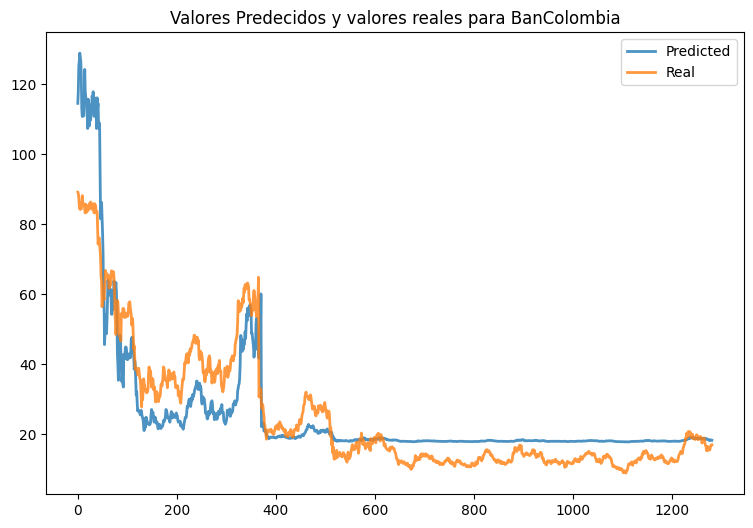

In [ ]:
plt.figure(figsize=(9,6))
plt.plot(prediccion, label='Predicted', lw=2, alpha=.8)
plt.plot(y_test, label='Real', lw=2, alpha=.8)
plt.title('Valores Predecidos y valores reales para BanColombia')
plt.legend()
plt.xticks(rotation=.3)
plt.show()